# Spotify top charting songs 2021

In [1]:
# Import packages that will be used

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
# Read in the data

songs = pd.read_csv('spotify_dataset.csv')

In [3]:
# Take a look at the data

songs

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,indie rock italiano,...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,australian hip hop,...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,pop,...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,pop,...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,lgbtq+ hip hop,...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1552,195,1,2019-12-27--2020-01-03,New Rules,"4,630,675",Dua Lipa,27167675,2ekn2ttSfGqwhhate0LSR0,dance pop,...,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608,A
1552,1553,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,"4,623,030",Jorge & Mateus,15019109,2PWjKmjyTZeDpmOUa3a5da,sertanejo,...,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714,B
1553,1554,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),"4,620,876",Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,dance pop,...,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394,D
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,brega funk,...,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881,F


In [4]:
# Look for columns with any missing data
# Loop through the data to find missing data by each column

for col in songs.columns:
    null_columns = (songs[col] == " ").sum()
    print('{} - {}'.format(col, null_columns))

Index - 0
Highest Charting Position - 0
Number of Times Charted - 0
Week of Highest Charting - 0
Song Name - 0
Streams - 0
Artist - 0
Artist Followers - 11
Song ID - 11
Genre - 11
Release Date - 11
Weeks Charted - 0
Popularity - 11
Danceability - 11
Energy - 11
Loudness - 11
Speechiness - 11
Acousticness - 11
Liveness - 11
Tempo - 11
Duration (ms) - 11
Valence - 11
Chord - 11


In [5]:
# Use only rows without missing data

songs_clean = songs[(songs['Artist Followers'] != " ")]
songs_clean

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,indie rock italiano,...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,australian hip hop,...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,pop,...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,pop,...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,lgbtq+ hip hop,...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1552,195,1,2019-12-27--2020-01-03,New Rules,"4,630,675",Dua Lipa,27167675,2ekn2ttSfGqwhhate0LSR0,dance pop,...,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608,A
1552,1553,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,"4,623,030",Jorge & Mateus,15019109,2PWjKmjyTZeDpmOUa3a5da,sertanejo,...,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714,B
1553,1554,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),"4,620,876",Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,dance pop,...,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394,D
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,brega funk,...,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881,F


In [6]:
# Data types of columns

print(songs.dtypes)

Index                         int64
Highest Charting Position     int64
Number of Times Charted       int64
Week of Highest Charting     object
Song Name                    object
Streams                      object
Artist                       object
Artist Followers             object
Song ID                      object
Genre                        object
Release Date                 object
Weeks Charted                object
Popularity                   object
Danceability                 object
Energy                       object
Loudness                     object
Speechiness                  object
Acousticness                 object
Liveness                     object
Tempo                        object
Duration (ms)                object
Valence                      object
Chord                        object
dtype: object


In [7]:
# It appears that some numeric data types are categorized as object in the dataset
# Convert Streams, Artist Followers, Weeks Charted... to float and integer data types

songs_clean['Artist Followers'] = pd.to_numeric(songs_clean['Artist Followers'])

<ipython-input-7-d933eafa9e40>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_clean['Artist Followers'] = pd.to_numeric(songs_clean['Artist Followers'])


In [8]:
songs_clean['Popularity'] = pd.to_numeric(songs_clean['Popularity'])
songs_clean['Danceability'] = pd.to_numeric(songs_clean['Danceability'])
songs_clean['Energy'] = pd.to_numeric(songs_clean['Energy'])
songs_clean['Loudness'] = pd.to_numeric(songs_clean['Loudness'])
songs_clean['Speechiness'] = pd.to_numeric(songs_clean['Speechiness'])
songs_clean['Acousticness'] = pd.to_numeric(songs_clean['Acousticness'])
songs_clean['Liveness'] = pd.to_numeric(songs_clean['Liveness'])
songs_clean['Tempo'] = pd.to_numeric(songs_clean['Tempo'])
songs_clean['Duration (ms)'] = pd.to_numeric(songs_clean['Duration (ms)'])
songs_clean['Valence'] = pd.to_numeric(songs_clean['Valence'])

<ipython-input-8-bb1b0a5cdd30>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_clean['Popularity'] = pd.to_numeric(songs_clean['Popularity'])
<ipython-input-8-bb1b0a5cdd30>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_clean['Danceability'] = pd.to_numeric(songs_clean['Danceability'])
<ipython-input-8-bb1b0a5cdd30>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [9]:
print(songs_clean.dtypes)

Index                          int64
Highest Charting Position      int64
Number of Times Charted        int64
Week of Highest Charting      object
Song Name                     object
Streams                       object
Artist                        object
Artist Followers               int64
Song ID                       object
Genre                         object
Release Date                  object
Weeks Charted                 object
Popularity                     int64
Danceability                 float64
Energy                       float64
Loudness                     float64
Speechiness                  float64
Acousticness                 float64
Liveness                     float64
Tempo                        float64
Duration (ms)                  int64
Valence                      float64
Chord                         object
dtype: object


In [10]:
# To convert Streams column into a numeric data type, the commas must be removed

songs_clean['Streams'] = songs_clean['Streams'].str.replace(',', '')

<ipython-input-10-0d5dac888b83>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_clean['Streams'] = songs_clean['Streams'].str.replace(',', '')


In [11]:
songs_clean['Streams'] = pd.to_numeric(songs_clean['Streams'])
print(songs_clean.dtypes)

Index                          int64
Highest Charting Position      int64
Number of Times Charted        int64
Week of Highest Charting      object
Song Name                     object
Streams                        int64
Artist                        object
Artist Followers               int64
Song ID                       object
Genre                         object
Release Date                  object
Weeks Charted                 object
Popularity                     int64
Danceability                 float64
Energy                       float64
Loudness                     float64
Speechiness                  float64
Acousticness                 float64
Liveness                     float64
Tempo                        float64
Duration (ms)                  int64
Valence                      float64
Chord                         object
dtype: object


<ipython-input-11-7c0c1a162143>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_clean['Streams'] = pd.to_numeric(songs_clean['Streams'])


<ipython-input-12-1aae4e86373a>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels)


[Text(0, 0.0, '0.0 Million'),
 Text(0, 10000000.0, '10.0 Million'),
 Text(0, 20000000.0, '20.0 Million'),
 Text(0, 30000000.0, '30.0 Million'),
 Text(0, 40000000.0, '40.0 Million'),
 Text(0, 50000000.0, '50.0 Million'),
 Text(0, 60000000.0, '60.0 Million')]

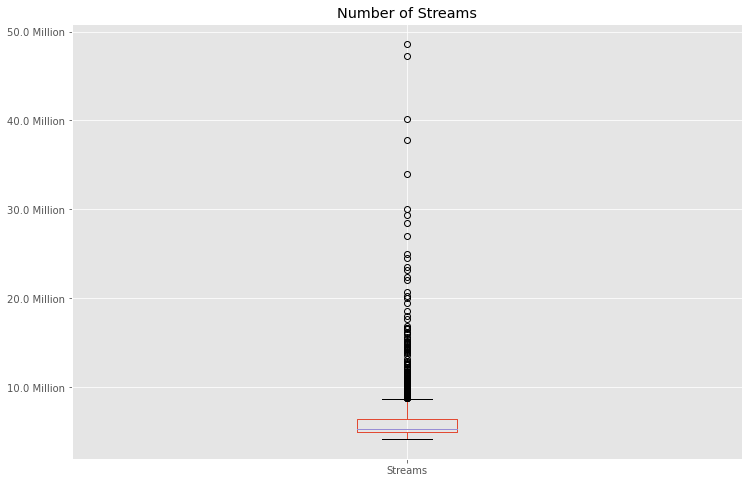

In [12]:
# Look for outliers

g = songs_clean.boxplot(column=['Streams'])
plt.title("Number of Streams")
plt.ticklabel_format(style='plain', axis='y')
ylabels = ['{:,.1f}'.format(y) + ' Million' for y in g.get_yticks()/1000000]
g.set_yticklabels(ylabels)


<ipython-input-13-c636770a64af>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels)


[Text(0, 0.0, '0.0 Million'),
 Text(0, 10000000.0, '10.0 Million'),
 Text(0, 20000000.0, '20.0 Million'),
 Text(0, 30000000.0, '30.0 Million'),
 Text(0, 40000000.0, '40.0 Million'),
 Text(0, 50000000.0, '50.0 Million'),
 Text(0, 60000000.0, '60.0 Million')]

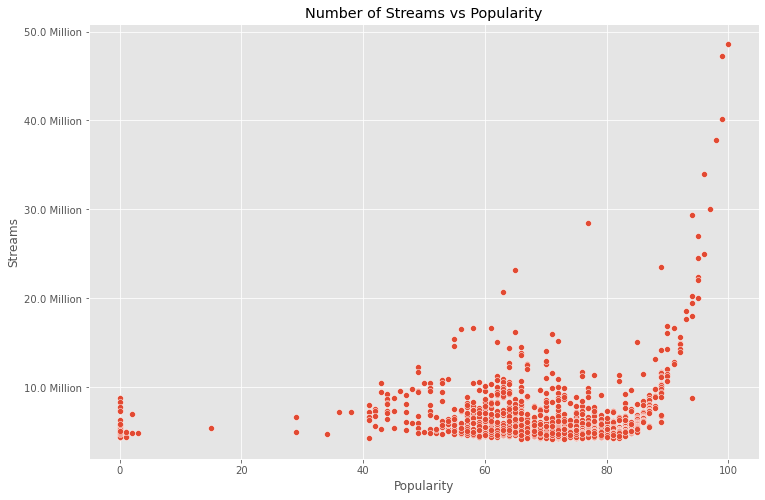

In [13]:
# Compare number of streams with popularity of song

g = sns.scatterplot(x="Popularity", y="Streams", data=songs_clean)
plt.title("Number of Streams vs Popularity")
plt.ticklabel_format(style='plain', axis='y')
ylabels = ['{:,.1f}'.format(y) + ' Million' for y in g.get_yticks()/1000000]
g.set_yticklabels(ylabels)

<ipython-input-14-f1f59c1216b1>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels)


[Text(0, 0.0, '0.0 Million'),
 Text(0, 10000000.0, '10.0 Million'),
 Text(0, 20000000.0, '20.0 Million'),
 Text(0, 30000000.0, '30.0 Million'),
 Text(0, 40000000.0, '40.0 Million'),
 Text(0, 50000000.0, '50.0 Million'),
 Text(0, 60000000.0, '60.0 Million')]

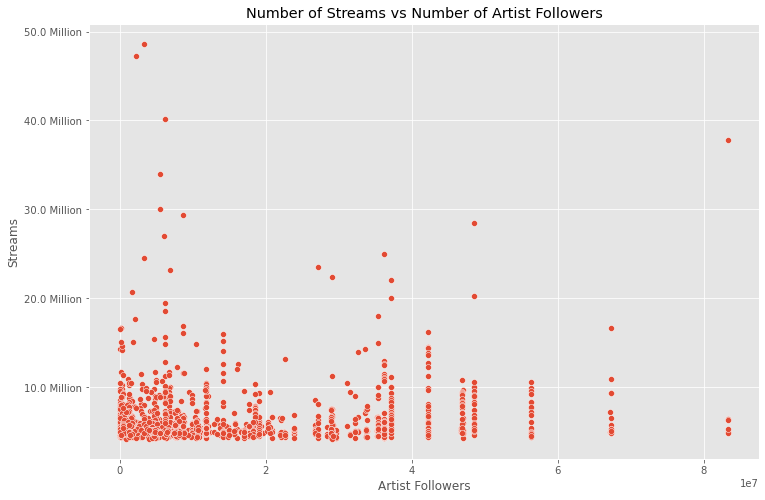

In [14]:
# Compare Artist Followers and Streams

g = sns.scatterplot(x="Artist Followers", y="Streams", data=songs_clean)
plt.title("Number of Streams vs Number of Artist Followers")
plt.ticklabel_format(style='plain', axis='y')
ylabels = ['{:,.1f}'.format(y) + ' Million' for y in g.get_yticks()/1000000]
g.set_yticklabels(ylabels)

In [15]:
# Corrleation matrix between numeric columns

songs_clean.corr(method = 'pearson')

,Index,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
Index,1.000000,0.251112,-0.360013,-0.258741,0.090887,-0.333683,0.126254,-0.018813,-0.014321,0.109213,-0.063914,0.028976,0.023622,-0.023481,-0.054632
Highest Charting Position,0.251112,1.000000,-0.417748,-0.295442,-0.233723,-0.164167,0.017149,0.063026,0.032166,0.041248,-0.012924,0.012718,0.026235,-0.033956,0.045362
Number of Times Charted,-0.360013,-0.417748,1.000000,-0.060542,0.027458,0.232796,0.027026,-0.061139,0.031225,-0.060216,0.046651,-0.058436,-0.048307,0.033980,0.021570
Streams,-0.258741,-0.295442,-0.060542,1.000000,0.103251,0.123184,-0.081291,0.004145,-0.031155,-0.062620,0.034054,0.042105,0.053458,0.015964,0.038381
Artist Followers,0.090887,-0.233723,0.027458,0.103251,1.000000,0.104358,-0.097576,-0.065613,-0.033264,-0.072968,0.023830,-0.012491,-0.019881,0.142145,-0.108804
Popularity,-0.333683,-0.164167,0.232796,0.123184,0.104358,1.000000,0.028435,0.094691,0.158767,-0.032091,-0.091245,-0.029460,-0.024951,0.082096,-0.000953
Danceability,0.126254,0.017149,0.027026,-0.081291,-0.097576,0.028435,1.000000,0.142130,0.234928,0.237394,-0.316798,-0.114518,-0.040219,-0.101390,0.361627
Energy,-0.018813,0.063026,-0.061139,0.004145,-0.065613,0.094691,0.142130,1.000000,0.732616,0.023989,-0.542399,0.124693,0.113352,0.056624,0.356325
Loudness,-0.014321,0.032166,0.031225,-0.031155,-0.033264,0.158767,0.234928,0.732616,1.000000,-0.018823,-0.477431,0.043141,0.104371,0.075262,0.298762
Speechiness,0.109213,0.041248,-0.060216,-0.062620,-0.072968,-0.032091,0.237394,0.023989,-0.018823,1.000000,-0.131436,0.072774,0.111255,-0.089895,0.038032


In [ ]:
correlation_matrix = songs_clean.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation matrix for Top Streamed Songs")

In [ ]:
# Use factorize to assign a numeric value to categorical value in order to determine correlation

correlation_matrix = songs_clean.apply(lambda x: x.factorize()[0]).corr()

In [ ]:
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation matrix for Top Streamed Songs")

In [ ]:
sorted_pairs = correlation_matrix.unstack().sort_values(kind="quicksort")
print(sorted_pairs)

In [ ]:
high_corr = sorted_pairs[abs(sorted_pairs) > 0.5]
print(high_corr)

In [ ]:
# Look at top 10 artists with the highest number of streams

ArtistStreamSum = songs_clean.groupby('Artist')[["Streams"]].sum()
ArtistStreamSumSorted = ArtistStreamSum.sort_values("Streams", ascending=False)[:10]
ArtistStreamSumSorted

In [ ]:
# Which genres are the most popular in top charting list

songs_clean["Genre"].value_counts()[:10]

In [ ]:
# Do songs in certain keys get more streams?

sns.stripplot(x='Chord', y='Streams', data=songs_clean)